# MATH 189 Project 2
## Group 2, Winter 2021

Members:
- Kasen Teoh
- Chung En Pan
- Nathan Fallahi
- Parsa Ganjooi
- Eamon Jarrett-Mann

# Introduction

The lure of virtual reality where anything is possible attracts countless students. Students turn to video games for relaxation and freedom. While some may consider video games as a negative influence, video games offer benefits, such as exercising the brain and improving problem-solving abilities. In this project, we aim to utilize a survey given to a random sample of 95 students in the Statistics 2 Section 1 class in the term of Fall 1994. By analyzing the survey results, we hope to form a discussion section that combines the benefits and relaxation of video games with informative and useful discussion sessions. 
    In our analysis, we aim to ask: How should new discussions look like? To answer this question we break down our analysis into smaller parts:
- Providing an interval estimate as well as a point estimate for the fraction of students who played video games in the week prior to the survey. 
- How the amount of time spent playing video games in the week prior to the survey compares to the reported frequency of play (daily, weekly, etc). How might the fact that there was an exam in the week prior to the survey affect your previous estimates and this comparison?
- Making an interval estimate for the average amount of time spent playing video games in the week prior to the survey and a simulation study confirming that the interval estimate is valid
- If the students enjoy playing video games, making a list of reasons for liking/disliking
- Look at the differences between those who like to play video games and those who do not. 
- Investigating how does that match the target distribution of 20% A, 30% B, 40% C, and 10% D, and if the non-responders were failing students who no longer bothered to come to the discussion section, would this change the results?
- Is there a relationship between the games played and the expected grade of the course?

With the successful completion of our analysis, we would be able to provide information on the correlation between video games and education and whether video games can be leveraged into producing a more enjoyable and interactive environment for students to learn. 


# Data

In [1]:
# imports and setup

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import scipy
import math
from statsmodels.graphics.gofplots import qqplot_2samples
from statsmodels.stats.proportion import proportions_ztest
from astropy.stats import jackknife_resampling
from astropy.stats import jackknife_stats
from scipy import stats
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = "{:,.3f}".format

sns.set()
sns.set_context('talk')

In [2]:
# load the data and take a look
df = pd.read_csv('video.txt', sep='\\s+')
df2 = pd.read_csv('videoMultiple.txt', sep = '\\s+')
df2.columns = df2.columns.str.replace('time', 'time_reason')

* Time: number of hours played in the prior week (in the smaller dataset)
* Like (to play): 1-never played, 2-very much, 3-somewhat, 4-not really, 5-not at all
* Where (to play): 1-arcade, 2-home system, 3-home computer, 4-arcade and one other, 5- home computer and system, 6-all three
* freq: 1-daily, 2-weekly, 3-monthly, 4-semesterly
* (Play if) busy: 1-yes, 0-no
* (think playing is) educ(ational):  1-yes, 0-no
* Sex:  1-male, 0-female
* Age: in years
* home:  has a computer at home 1-yes, 0-no
* (hate) math:  1-yes, 0-no
* work: number of hours worked in the prior week
* own (PC):  1-yes, 0-no
* (PC has) cd-rom:  1-yes, 0-no
* (have) email:  1-yes, 0-no
* grade (expected): 4-A, 3-B, 2-C, 1-D, 0-F
* action: plays action games
* adv: plays adventure games
* sim: plays simulation games
* sport: plays sport games
* strategy: plays strategy games
* relax: plays games to relax
* coord: plays games for hand/eye coordination
* challenge: plays games to challenge themselves
* master: plays games for the feeling of mastery
* bored: plays games because they are bored
* other: plays games for another reason (fitb)
* graphic: plays games for the graphics
* frust: dislikes games because they are frustrating
* lonely: dislikes games because they are lonely
* time: dislikes games because they are a waste of time (larger dataset)
* rules: dislikes games because there are too many rules
* cost: dislikes games because they cost too much
* boring: dislikes games because they are boring
* friends: dislikes games because their friends do not play
* point: dislikes games because they think it is pointless
* other2: dislikes games for some other reason (fitb)

Clearly, Time, Work and Age are continuous, while every other variable is categorical. The other variables (other & other2) are fill in the blank, not really continuous or discrete, just text.

# Background

No one person is the same. Students have different ways of learning and being successful. It is hard to say one way works the best. Some students are visual learners while others are kinesthetic or auditory learners. Nevertheless, the notion of learning is crucial to not only the advancement of an individual but to society as well. An issue that has risen among countless students has been the inability to maintain focus while studying. However, it is simply not the attention span that is low, but the subjects that are being taught may not be intellectually stimulating enough. For instance, many students are able to focus on playing video games for many hours throughout the day. Video games have been known to develop and enhance a particular set of skills, and if we are able to study video games and integrate them into the school curriculum, students may enjoy learning much more. In an observational study, analyzing the effects of solitary and collaborative game playing on learning and motivation, both groups achieved equally positive learning outcomes in a game. Students significantly improve judging by their pre- and post-test assessments, indicating that the gaming experience affects their overall performance, and promotes conceptual understanding (Chen et al., 2015). Additionally, it has been noted that computer games impact mathematical learning, revealing the positive effect of games on student learning outcomes (Divjak et al., 2011). 
    Aside from cognitive improvements, video games also aid in the advancement of soft skills as well, serious online games improve the quality of learning when it comes to problem-based situations in the workplace by using active collaboration (Hummel et al., 2011). Numerous studies have provided evidence of games and simulations leading to improved affective outcomes for university students such as attitudes, motivation, emotional involvement, self-efficacy, and satisfaction (Vlachopoulos et al., 2017). Utilizing the outcomes of video games on student’s cognitive abilities and soft skills, it may be possible to integrate video games into students’ education that are both intellectually stimulating and enjoyable. 
Research exploring learning in video games argue that good games can get people to learn challenging concepts while enjoying them at the same time. In contrast to textbooks that present all learning material in a single written location, games can present information to players piece by piece as needed and test their skills as the game progresses. Some games even offer adaptively difficulty so each player can play at a difficulty appropriate for them (Gee 2003). Designers of a new computer lab could look to these ideas that are central to the mechanics of good video games. It’s not hard to imagine a video game that teaches educational topics that can adapt problems to the various skill levels of students. This is in sharp contrast to traditional learning settings where all students participating in the same course are expected to have roughly the same command of the material.



# Investigation
How can we use this survey to inform the design of the new computer lab?

## Question 1.

Begin by providing an estimate for the fraction of students who played a video game in the week prior to the survey. Provide an interval estimate as well as a point estimate for this proportion. 

In [3]:
from statsmodels.stats.proportion import proportion_confint
expec = (len(df) - sum(df.time == 0)) / len(df) 
var = (expec * (1 - expec)/(len(df) - 1)) * ((314 - len(df))/(314))
std = var ** 1/2
interval_est = ( expec - ( 1.96 * std ), expec + ( 1.96 * std ))
print("point estimate: " + str(expec) + "\ninterval estimate: " + str(interval_est))

point estimate: 0.37362637362637363
interval estimate: (0.37181657702088866, 0.3754361702318586)


## Question 2. 

Check to see how the amount of time spent playing the video games in the week prior to the survey compares the reported frequency of play. How might the fact that there was an exam in the week prior to the survey affect your previous estimates and this comparison? 

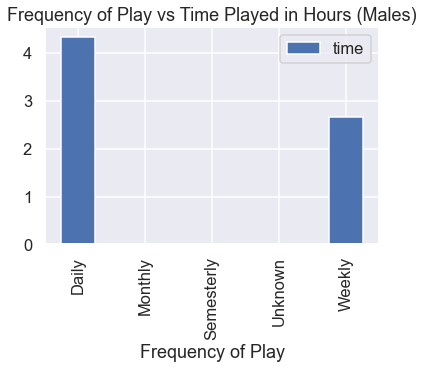

In [4]:
male = df[df['sex'] == 1][['time', 'freq']]
male['freq'].replace({99: 'Unknown', 1: 'Daily', 2: 'Weekly', 3: 'Monthly', 4: 'Semesterly'}, inplace = True)
male.groupby(by = ['freq']).mean().plot(kind = 'bar')
plt.title('Frequency of Play vs Time Played in Hours (Males)')
plt.xlabel('Frequency of Play')
plt.show()

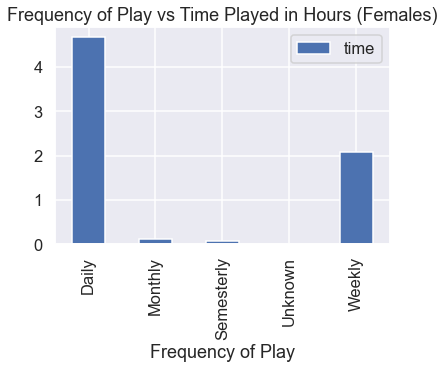

In [5]:
female = df[df['sex'] == 0][['time', 'freq']]
female['freq'].replace({99: 'Unknown', 1: 'Daily', 2: 'Weekly', 3: 'Monthly', 4: 'Semesterly'}, inplace = True)
female.groupby(by = ['freq']).mean().plot(kind = 'bar')
plt.title('Frequency of Play vs Time Played in Hours (Females)')
plt.xlabel('Frequency of Play')
plt.show()

In [6]:
male = df[df['sex'] == 1][['time', 'freq', 'grade']]
female = df[df['sex'] == 0][['time', 'freq', 'grade']]
m_mean = male['time'].mean()
temp_m = male[['freq']].groupby('freq')['freq'].count() / len(male)
row = [list(temp_m)]
row[0].insert(0, round(m_mean, 3))

f_mean = female['time'].mean()
temp_f = female[['freq']].groupby('freq')['freq'].count() / len(female)
row.append(list(temp_f))
row[1].insert(0, f_mean)

m_vs_p = pd.DataFrame(row, columns = ['Mean Time Playing (Hours)', 'Freq: Daily', 'Freq: Weekly', 'Freq: Monthly', 'Freq: Semesterly', 'Unknown'], index = ['Males', 'Females'])
m_vs_p

,Mean Time Playing (Hours),Freq: Daily,Freq: Weekly,Freq: Monthly,Freq: Semesterly,Unknown
Males,1.596,0.113,0.415,0.189,0.170,0.113
Females,0.750,0.079,0.158,0.211,0.368,0.184


In the above table, we see that males typically play games weekly while females typically play semesterly. For males, the mean playing time one week prior to the survey was around 1.5 hours. For females, the mean playing time was around 0.75 hours. 

Immediately, we see that for males the mean time spent playing games a week prior to the survey and the frequency of playing games agrees with each other. The proportion suggests that males play games on a weekly basis, meaning that they might play for only a few hours each week, regardless of whether there is an exam. 

For females, the average time spent playing games a week prior to the survey is around half of the mean for males. The frequency of playing games for females suggests that most female students play on a semester basis, meaning that they might play a few times throughout the semester. We believe that the calculated mean time spent playing games for females is an underestimate of the true mean of time spent playing games when there is no exam. 

## Question 3. 

Consider making an interval estimate (confidence interval) for the average amount of time spent playing video games in the week prior to the survey. Keep in mind the overall shape of the sample distribution. A simulation study may help determine the appropriateness of an interval estimate. 

In our analysis, we had implemented confidence intervals to answer a number of questions. A confidence interval allows us to estimate the true population mean or proportion of the variable of interest. Additionally, a confidence interval requires the following assumptions to be satisfied by the data: independent, identically distributed, and having a finite mean and variance. If the data satisfies these conditions, then we are able to implement the following formula: Confidence Interval = ($\bar{x}\pm z \cdot \frac{s\sqrt{N-n}}{\sqrt{nN}}$) <br>
where $s^2 = \frac{1}{n-1}\sum{(x-\bar{x})^2}$ and $E[\frac{s^2 \cdot (N - n)}{n \cdot (N)}] = \sigma ^2$

In [7]:
N = 314   #Number of students in the class
n = len(df)
units = round(N/n)
xbar = df['time'].mean()
z = 1.96
s2 = 0


for i in df['time']:
    s2 += (i - xbar) ** 2
s2 = s2 / (n - 1)   #estimator for sigma squared
se = math.sqrt((s2 * (N - n)) / (n * N))   #standard error. Not square rooted is estimator for var(xbar)
lower = xbar - z * se
upper = xbar + z * se

print('Known data for a two sided 95% confidence interval: ')
print('\tSample Mean:\t\t\t' + str(round(xbar, 3)))
print('\tEstimator of Standard Error:\t' + str(round(se, 3)))
print('\tZ-value for 95%: \t\t' + str(z))
print('Confidence Interval: (' + str(round(lower, 3)) + ', ' + str(round(upper, 3)) + ')')
print('\nAssuming the assumptions for the Central Limit Theorem are met, we are 95% confident that the \n' +  
      'true mean number of hours spent playing video games a week before the survey is between ' + str(round(lower, 3)) + ' and ' + str(round(upper, 3)))

Known data for a two sided 95% confidence interval: 
	Sample Mean:			1.243
	Estimator of Standard Error:	0.334
	Z-value for 95%: 		1.96
Confidence Interval: (0.589, 1.897)

Assuming the assumptions for the Central Limit Theorem are met, we are 95% confident that the 
true mean number of hours spent playing video games a week before the survey is between 0.589 and 1.897


In order to use the formula noted above, our data is required to meet a few assumptions: 
- Independent
- Identically Distributed
- Finite Mean and Variance

Our sample data set, because it is a survey, is not independent because we are sampling without replacement. Or in other words, with the picking of a single student, the probability of picking following students increases. Hence we want to use Bootstrapping to identify whether our data is approximately normal and if our above confidence interval is valid.

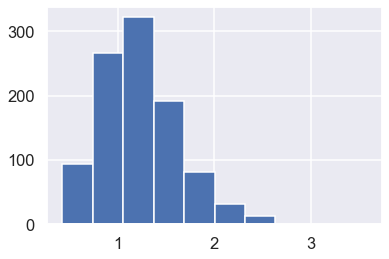

In [8]:
bs_pop = np.array(np.repeat(df['time'], math.ceil(N/n)))

simulations = 1000
bs_sample = []

for i in range(simulations):
    temp = np.random.choice(bs_pop, len(df['time']))
    bs_sample.append(round(temp.mean(),3))
    
bs_sample = np.array(bs_sample)
plt.hist(bs_sample)
plt.show()

When using the bootstrap sample, we see that the histogram is unimodal; however, not symmetrical with a tail, skewed right. Hence, we believe that the data is not normal.

In [9]:
bs_mean = np.mean(bs_sample)
bs_ci = np.percentile(bs_sample, [2.5, 97.5])

print('Known data for a two sided 95% confidence interval using bootstrapped data: ')
print('\tBootstrapped Mean:\t' + str(round(bs_mean, 3)))
print('\tZ-value for 95%: \t' + str(z))
print('Confidence Interval: (' + str(round(bs_ci[0], 3)) + ', ' + str(round(bs_ci[1], 3)) + ')')
print('\nUsing the bootstrapped data, we calculate a larger confidence interval, we are 95% confident that the \n' +  
      'true mean number of hours spent playing video games a week before the survey is between ' + str(round(bs_ci[0], 3)) + ' and ' + str(round(bs_ci[1], 3)))

Known data for a two sided 95% confidence interval using bootstrapped data: 
	Bootstrapped Mean:	1.232
	Z-value for 95%: 	1.96
Confidence Interval: (0.597, 2.188)

Using the bootstrapped data, we calculate a larger confidence interval, we are 95% confident that the 
true mean number of hours spent playing video games a week before the survey is between 0.597 and 2.188


To confirm the normality of the boostrap sample, we perform a Kurtosis and Skewness Simulation Test as well as a qq-plot.


In [10]:
def simulation_study(series):
    kurtosis_temp = np.array([])
    for i in np.arange(1000):
        shuffle = np.random.normal(0, 1, len(series))#variance check python parameters
        kurtosis = scipy.stats.kurtosis(shuffle,fisher = False) 
        kurtosis_temp = np.append(kurtosis_temp, kurtosis)
    return kurtosis_temp

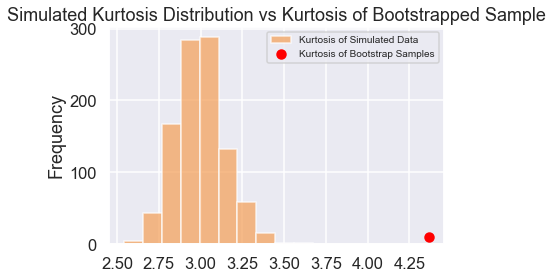

4.366874704232581

In [11]:
bs_sample_stand = (bs_sample - bs_sample.mean())/bs_sample.std()
bs_sample_kurtosis = scipy.stats.kurtosis((bs_sample_stand), fisher = False)
k_time = pd.DataFrame().assign(bs_kurtosis = simulation_study(bs_sample))
gr = k_time.plot(kind = 'hist', color ='sandybrown', alpha = 0.75, xticks = np.arange(2.5, 5, 0.25))
gr.set_title('Simulated Kurtosis Distribution vs Kurtosis of Bootstrapped Sample') 
plt.scatter(bs_sample_kurtosis, 10, color= 'red', s= 80, zorder = 2.5)
plt.legend(['Kurtosis of Simulated Data', 'Kurtosis of Bootstrap Samples'], prop={'size': 10}, loc = "upper right")

plt.show()
bs_sample_kurtosis

We plot the kurtosis coefficient of our bootstrapped samples (red dot) along with the kurtosis coefficient from normal distribution (orange histogram). We note that the kurtosis coefficient of the bootstrapped data is not close to the center of the histogram, which is 3. We then conclude that the bootstrapped sample is not approximately normal.

In [12]:
bs_skew = scipy.stats.skew(bs_sample)
normal_skew = scipy.stats.skew(k_time['bs_kurtosis'])

print('Using our boostrap sample of 500 data points, we see that the skewness coefficient is ' + str(round(bs_skew, 3)) + 
      '. \nThen, we know that the skewness of a normal distribution is 0')

print('\nWith the skewness coefficient of the bootstrapped sample is not close to the skewness coefficient of \na Gaussian Distribution,'
      + ' we conclude that the the bootstrapped sample does have a large skew. ')

Using our boostrap sample of 500 data points, we see that the skewness coefficient is 0.816. 
Then, we know that the skewness of a normal distribution is 0

With the skewness coefficient of the bootstrapped sample is not close to the skewness coefficient of 
a Gaussian Distribution, we conclude that the the bootstrapped sample does have a large skew. 


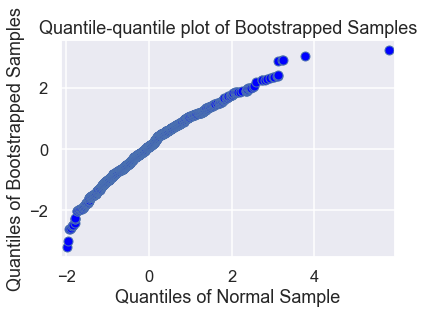

In [13]:
normal = np.random.normal(0, 1, simulations)

pp_y = sm.ProbPlot(bs_sample_stand); # Standardize? (bs_sample - bs_sample.mean()) / bs_sample.std()
pp_x = sm.ProbPlot(normal);
qqplot_2samples(pp_x, pp_y)
plt.title('Quantile-quantile plot of Bootstrapped Samples')
plt.xlabel('Quantiles of Normal Sample')
plt.ylabel('Quantiles of Bootstrapped Samples')
plt.show()

In the qq-plot above, it contains a faint s-shaped curved and the right end of the qq plot is more spread out than the left end. This is in line with the Kurtosis and Skewness Coefficient of the bootstrapped samples. Hence, we conclude that our data is not approximately normally distributed, and initial confidence intervals generated when assuming CLT assumptions were met, is invalid. 

Using the kurtosis and skewness coefficients and the histogram and qq-plots, we are fairly confident that the distribution of the bootstrapped sample data is not approximately normal, consequenctly, our data is not normal.


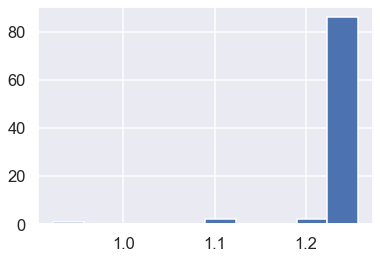

In [14]:
resamples = jackknife_resampling(np.array(df['time']))
estimate, bias, stderr, jk_ci = jackknife_stats(np.array(df['time']), np.mean, 0.95)
jk_sample = []
for i in resamples:
    jk_sample.append(i.mean())

jk_sample = np.array(jk_sample)
plt.hist(jk_sample)
plt.show()

Above, we plot the 91 sample means using the jackknife resampling method. The histogram below is not normal and only has a few values because initially, time is a continuous variable. However, in the survey given, students were given a limited amount of answers to choose from, leading to many tied values in the sample. 

In [15]:
jk_sample_stand = (jk_sample - jk_sample.mean())/jk_sample.std()
jk_sample_kurtosis = scipy.stats.kurtosis(jk_sample, fisher = False)
print('The jackknife sample kurtosis coefficient is', str(round(jk_sample_kurtosis, 3)) + 
      '. Because we know the kurtosis coefficient of a normal distribution ' + 
      '\nis approximately 3, we conclude that the jackknife sample is not normally distributed. ' + 
      'Hence, our data, itself, \nis not normally distributed, and once again, we cannot use our originaly confidence interval because we had ' + 
      '\nassumed the conditions for the Central Limit Thereom were met.')

The jackknife sample kurtosis coefficient is 40.699. Because we know the kurtosis coefficient of a normal distribution 
is approximately 3, we conclude that the jackknife sample is not normally distributed. Hence, our data, itself, 
is not normally distributed, and once again, we cannot use our originaly confidence interval because we had 
assumed the conditions for the Central Limit Thereom were met.


In [16]:
jk_mean = np.mean(jk_sample)

print('Known data for a two sided 95% confidence interval using jackknife data: ')
print('\tJackknife Mean:\t\t' + str(round(jk_mean, 3)))
print('\tZ-value for 95%: \t' + str(z))
print('Confidence Interval: (' + str(round(jk_ci[0], 3)) + ', ' + str(round(jk_ci[1], 3)) + ')')
print('\nUsing the jackknife data, we calculate a larger confidence interval, we are 95% confident that the \n' +  
      'true mean number of hours spent playing video games a week before the survey is between ' + str(round(bs_ci[0], 3)) + ' and ' + str(round(bs_ci[1], 3)))

Known data for a two sided 95% confidence interval using jackknife data: 
	Jackknife Mean:		1.243
	Z-value for 95%: 	1.96
Confidence Interval: (0.467, 2.019)

Using the jackknife data, we calculate a larger confidence interval, we are 95% confident that the 
true mean number of hours spent playing video games a week before the survey is between 0.597 and 2.188


In [17]:
print('Comparing CLT, Bootstrap, and Jackknife: ')

print('\tConfidence Interval (CLT): \t\t(' + str(round(lower, 3)) + ', ' + str(round(upper, 3)) + ')')
print('\tConfidence Interval (Bootstrapped): \t(' + str(round(bs_ci[0], 3)) + ', ' + str(round(bs_ci[1], 3)) + ')')
print('\tConfidence Interval (Jackknife): \t(' + str(round(jk_ci[0], 3)) + ', ' + str(round(jk_ci[1], 3)) + ')')

Comparing CLT, Bootstrap, and Jackknife: 
	Confidence Interval (CLT): 		(0.589, 1.897)
	Confidence Interval (Bootstrapped): 	(0.597, 2.188)
	Confidence Interval (Jackknife): 	(0.467, 2.019)


Initially, we had performed a two sided confidence interval for the mean number of hours spent playing video games a week prior to the survey with a 95% confidence level. However, because our data is from surveying, it violates the assumptions assumed by confidence intervals, specifically, the independent portion. Because our data may not be a normal distribution, we resample using boostrap and jackknife methods. Through these simulations, we note that the distributions are not approximately normal, and therefore the CLT confidence interval is not valid. Because both resampling methods, bootstrap and jackknife, do not require assumptions, both confidence intervals are valid, but also wider. 

## Question 4. 

Next consider the “attitude” questions. In general, do you think the students enjoy playing video games? If you had to make a short list of the most important reasons why students like/dislike video games, what would you put on the list>? Don’t forget that those students who say that they have never played video games or do not at all like video games are asked to skip over some of these questions. So, there may be many nonrespondents to the question as to whether they think video games are educational, where they play video games, etc. 

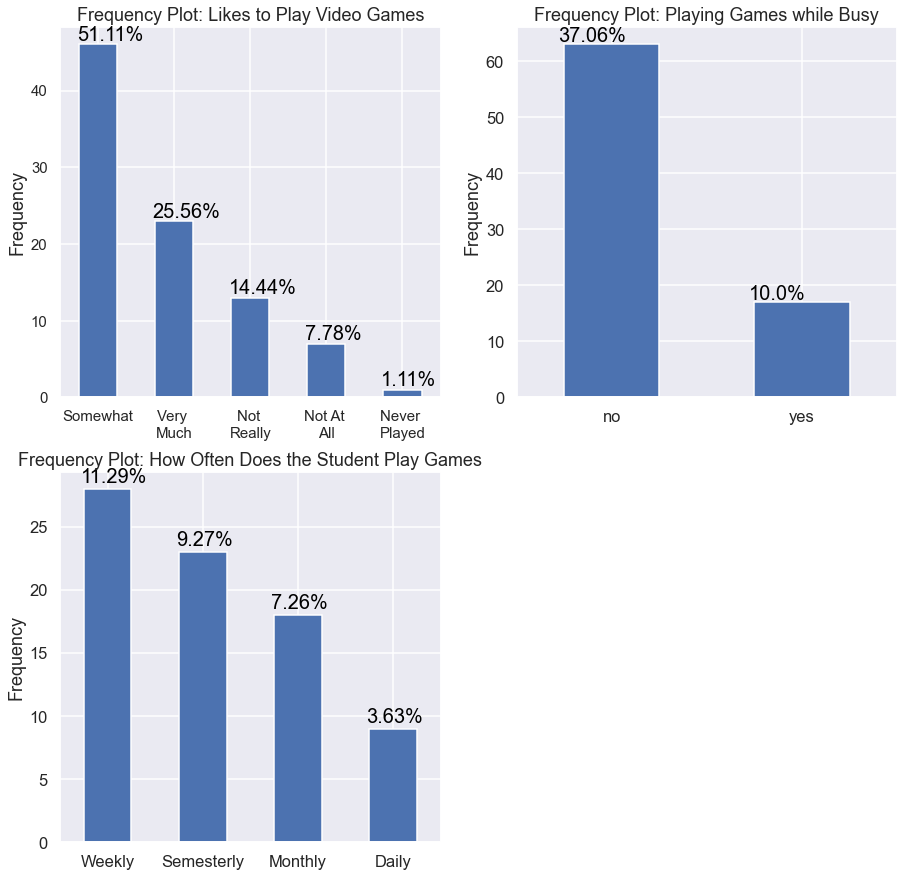

In [18]:
fig, axes = plt.subplots(2, 2, figsize = (15, 15))

df['like'].replace({99: np.nan, 1: 'Never \nPlayed', 2: 'Very \nMuch', 3: 'Somewhat', 4: 'Not \nReally', 5: 'Not At \nAll'}).dropna().value_counts().plot(kind = 'bar', ax = axes[0][0])
axes[0][0].set_title('Frequency Plot: Likes to Play Video Games')
axes[0][0].set_ylabel('Frequency')
axes[0][0].tick_params(labelrotation = 0, labelsize = 15)
totals = []

df['busy'].replace({99: np.nan, 0: 'no', 1: 'yes'}).dropna().value_counts().plot(kind = 'bar', ax = axes[0][1])
axes[0][1].set_title('Frequency Plot: Playing Games while Busy')
axes[0][1].set_ylabel('Frequency')
axes[0][1].tick_params(labelrotation = 0)

df['freq'].replace({99: np.nan, 1: 'Daily', 2: 'Weekly', 3: 'Monthly', 4: 'Semesterly'}).dropna().value_counts().plot(kind = 'bar', ax = axes[1][0])
axes[1][0].set_title('Frequency Plot: How Often Does the Student Play Games')
axes[1][0].set_ylabel('Frequency')
axes[1][0].tick_params(labelrotation = 0)

#Annotations
for ax in fig.axes:
    for i in ax.patches:
        totals.append(i.get_height())
    # set individual bar lables using above list
    total = sum(totals)
    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()-.03, i.get_height()+.5, \
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=20,
                    color='black', )

axes[1, 1].remove()
plt.show()

Above, we see the bar chart of how often a student plays games, whether the students plays while busy, and how much they like playing video games. We see that a majority of students somewhat like to play games and play weekly. We also note that students do not play video games on a daily basis. However, students are not likely to play video games when busy. This may be due to the fact that the students surveyed are attending a prestigious university and are able to focus on their studies first. Hence, we believe that students somewhat enjoy playing video games because if students extremely enjoy playing video games, the proportion of daily and/or weekly players would be higher. On the other hand, if students do not enjoy playing video games as much, the proportion of semesterly players (those who play games a few times a semester) would be higher. 

In our data set, the questions of playing games while the student is busy and how often a student plays games was only asked to students who had played games before, hence, our prediction may not be applicable to the entire survey respondent population. However, in the top left plot, we see that only 1.11% of respondents (1 respondent out of 90) noted that he/she had never played games before. Because only a single person had never played games before, this outlier does not significantly affect our hypothesis of students somewhat enjoying playing video games.

In [19]:
proportion_dislike = {}

for i in ['time_reason', 'frust', 'lonely', 'cost', 'boring', 'friends', 'point', 'rules']:
    proportion_dislike[i] = round(df2[i].sum() / len(df2), 3)
    
proportion_dislike = pd.DataFrame([proportion_dislike])

proportion_like = {}

for i in ['relax', 'coord', 'challenge', 'master', 'bored', 'graphic']:
    proportion_like[i] = round(df2[i].sum() / len(df2), 3)
    
proportion_like = pd.DataFrame([proportion_like])

pd.set_option("display.precision", 3)

print('Dislike Playing Video Games Reason')
proportion_dislike

Dislike Playing Video Games Reason


,time_reason,frust,lonely,cost,boring,friends,point,rules
0,0.462,0.253,0.044,0.385,0.154,0.022,0.319,0.187


In [20]:
print('Like Playing Video Games Reason')
proportion_like

Like Playing Video Games Reason


,relax,coord,challenge,master,bored,graphic
0,0.637,0.044,0.231,0.275,0.264,0.253


Comparing the two tables above, we see that for the first table (dislike), the most important reason why students dislike video games is because of the time and cost of video games. When playing video games, it is easy to lose track of time and play for extended periods of time. Additionaly, with video games, the more engaged, the more a player is inclined to spend money on better equipment or even into the video game. 

The second table, reason for enjoying video games, the most important reason recorded is the relaxation video games give to players. Players are able to escape into virtual reality, leaving their stress and problems behind. 

## Question 5. 

Look for the differences between those who like to play video games and those who don’t. To do this, use the questions in the last part of the survey, and make comparisons between male and female students, those who work for pay and this who don’t , those who own a computer and those who don’t. Graphical display and cross-tabulations are particularly helpful in making these kinds of comparisons. Also, you may want to collapse the range of responses to a question down to two or three possibilities before making these comparisons. 

In [21]:
like= df[(df.get('like') == 2) | (df.get('like') == 3 )].reset_index()
dont_like = df[(df.get('like') == 4) | (df.get('like') == 5)].reset_index()
like= like.get(['sex','work','home']).assign(like_to_play = 'Like')
dont_like= dont_like.get(['sex','work','home']).assign(like_to_play = 'Don\'t like')
scenario_5 = pd.concat([like,dont_like])
scenario_5.loc[scenario_5['work'] == 0, 'work'] = 'No'
scenario_5.loc[scenario_5['work'] != 'No', 'work'] = 'Yes'
scenario_5.loc[scenario_5['sex'] == 0, 'sex'] = 'Female'
scenario_5.loc[scenario_5['sex'] != 'Female', 'sex'] = 'Male'
scenario_5.loc[scenario_5['home'] == 0, 'home'] = 'Not owned'
scenario_5.loc[scenario_5['home'] != 'Not owned', 'home'] = 'owned'
scenario_5.head()

,sex,work,home,like_to_play
0,Female,Yes,owned,Like
1,Female,No,owned,Like
2,Male,No,owned,Like
3,Female,No,owned,Like
4,Female,No,owned,Like


To differentiate repsponses that have a distinction between the groups. I have combined observations that likes to play games 'very much' and 'somewhat' into those who likes to play; 'not really' and 'not at all' into don't like to play. In addition, observations who have worked for more than one hour are placed into the category 'Work', 'don't work' otherwise. For graphical displays and cross tabulation porposes, I've turned the categorical variables (0s, 1s) to words such as (owned (access PC at home), not owned (do not access PC at home); Males, Females; yes (work), no (don't work))


In [22]:
gender = pd.crosstab(scenario_5.get('like_to_play'), [scenario_5.get('sex')], margins = True)
work = pd.crosstab(scenario_5.get('like_to_play'), [scenario_5.get('work')], margins = True)
own = pd.crosstab(scenario_5.get('like_to_play'), [scenario_5.get('home')], margins = True)

In [23]:
own

home,Not owned,owned,All
like_to_play,,,
Don't like,2,18,20
Like,20,49,69
All,22,67,89


Above the diagram we can see that a majority of the people have access to PC at home like to play games more than those who do not like. For those who do not have access to PC at home, people like to play games are still more than those who do not like. Here we see a trend that wether you have acces to PC at home or not, a vast majority of students likes to play games. We are hypothesizing that for those who does not have access to PC at home but still like to play games might choose to arcades for their entertaiment; for those who have a PC at home and like to play games choose PC as where they have easy access.

In [24]:
work

work,No,Yes,All
like_to_play,,,
Don't like,14,6,20
Like,30,39,69
All,44,45,89


From this table above, we can conclude that in general people like to play games more than those who do not regarding those who work or not. It is visible to us that genders that work/ do not work have divided into two group with slight difference as well.


In [25]:
gender

sex,Female,Male,All
like_to_play,,,
Don't like,12,8,20
Like,26,43,69
All,38,51,89


Though there are slight bias that males have more observations, but in general both gender have a greater proportion of liking to play games.


In [26]:
gender = pd.crosstab(scenario_5.get('like_to_play'), [scenario_5.get('sex')])
work = pd.crosstab(scenario_5.get('like_to_play'), [scenario_5.get('work')])
own = pd.crosstab(scenario_5.get('like_to_play'), [scenario_5.get('home')])

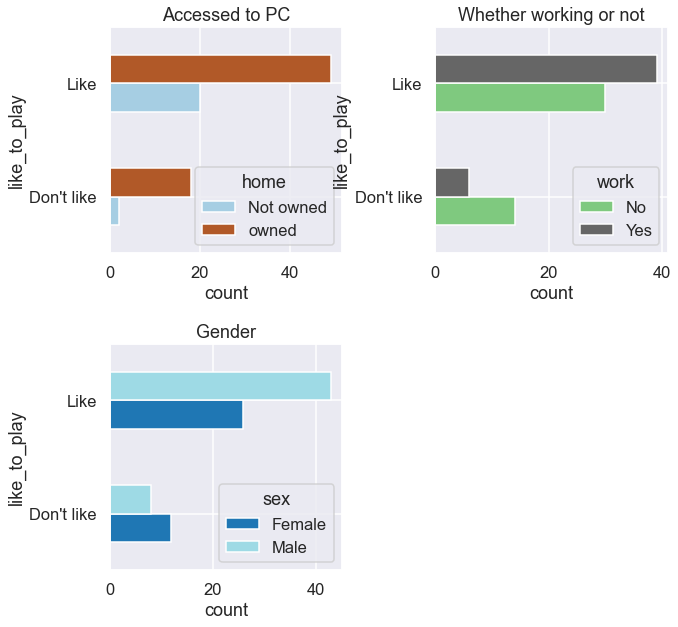

In [27]:
fig, axes = plt.subplots(2,2, figsize = (10,10))
own.plot(kind='barh', ax = axes[0][0],colormap = 'Paired')
work.plot(kind= 'barh',ax = axes[0][1],colormap = 'Accent')
gender.plot(kind= 'barh', ax= axes[1][0],colormap = 'tab20')

axes[0][0].set_title('Accessed to PC')
axes[0][0].set_xlabel('count')
axes[0][1].set_title('Whether working or not')
axes[0][1].set_xlabel('count')
axes[1][0].set_title('Gender')
axes[1][0].set_xlabel('count')
plt.subplots_adjust(hspace= 0.4,wspace= 0.4)
axes[1][1].remove()

Graphical display for each variable againt people who like to play and don't like to play. In general, the proportion of people like to play are greater than the people who don't like to play.

## Question 6. (optional)

Just for fun, further investigate the grade that students expect in the course. How does it match the target use in grade assignment of 20%A’s, 30% B’s, 40% C’s and 10% D or lower? If the nonrespondents were failing students who no longer bothered to come to the discussion section, would this change the picture? 


Mean expected grade: 3.2527472527472527
Mean target grade: 2.6


        # Expected  # Target
Grade                       
A               31    18.200
B               52    27.300
C                8    36.400
D or F           0     9.100


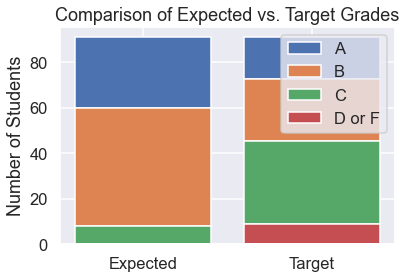

In [28]:
# compare the average expected vs. target grade
average_expected_grade = df['grade'].mean()
print(f'Mean expected grade: {average_expected_grade}')
print(f'Mean target grade: {.2*4 + .3*3 + .4*2 + .1*1}')

# see the diff. grades students expected
n = df['grade'].count()
expected_A = df['grade'].value_counts().loc[4]
expected_B = df['grade'].value_counts().loc[3]
expected_C = df['grade'].value_counts().loc[2]
expected_grades = [expected_A, expected_B, expected_C, 0]
target_dist = [.2,.3,.4,.1]
target_grades = np.dot(target_dist, 91)
grades_array = {'Grade': ['A','B','C','D or F'],
                '# Expected': expected_grades,
                '# Target': target_grades
               }
grades = pd.DataFrame(grades_array)
grades = grades.set_index('Grade')
print('\n') # for cleaner formatting
print(grades)

# stacked bar plot
grade_estimates = ['Expected', 'Target']
As = np.array([expected_grades[0], target_grades[0]])
Bs = np.array([expected_grades[1], target_grades[1]])
Cs = np.array([expected_grades[2], target_grades[2]])
Ds = np.array([expected_grades[3], target_grades[3]])

plt.bar(grade_estimates, As, label='A', bottom=Bs+Cs+Ds)
plt.bar(grade_estimates, Bs, label='B', bottom=Cs+Ds)
plt.bar(grade_estimates, Cs, label='C', bottom=Ds)
plt.bar(grade_estimates, Ds, label='D or F')

plt.ylabel('Number of Students')
plt.title('Comparison of Expected vs. Target Grades')
plt.legend(loc="upper right")
plt.show()

Above, we can see a brief numerical comparison between the students' average expected grade (via the survey results) and the target distribution of grades used in grade assignment. The students expect an average grade of a B-, while the target grade assignment aims for an average grade of a C. This expectation is notably higher than the target grade. We can also see a visualization of this breakdown of grades as a stacked bar plot. In contrast to the target grade assignment, few students expect to receive a grade of C or lower, which actually accounts for the majority of the target grades.

Perhaps, this result could be due to the fact that the survey was conducted during the discussion sections of the course. What if the worst performing students were those that didn't show up to their discussion section and thus did not complete the survey when randomly selected?

Let's repeat the above comparisons, but this time assume that the four students who didn't respond to the survey expected to fail the course.


Assuming four students failed...
Mean expected grade: 3.1578947368421053
Mean target grade: 2.6


        # Expected  # Target
Grade                       
A               31    19.000
B               52    28.500
C                8    38.000
D or F           4     9.500


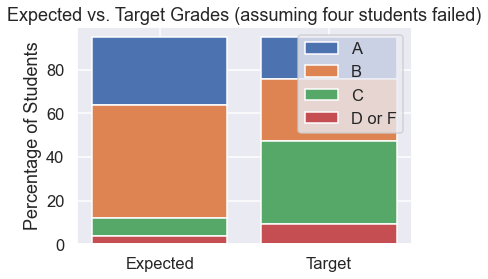

In [29]:
# Add the expected to fail values. Not the best way, but it works
# Note that values of 1=D and 0=F are treated the same
df95 = df['grade'].values
df95 = np.append(df95, [1,1,1,1])
df95 = pd.DataFrame(df95, columns=['grade'])

# compare the average expected vs. target grade
average_expected_grade95 = df95['grade'].mean()
print('Assuming four students failed...')
print(f'Mean expected grade: {average_expected_grade95}')
print(f'Mean target grade: {.2*4 + .3*3 + .4*2 + .1*1}')

# see the diff. grades students expected
n = df95['grade'].count()
expected_A95 = df95['grade'].value_counts().loc[4]
expected_B95 = df95['grade'].value_counts().loc[3]
expected_C95 = df95['grade'].value_counts().loc[2]
expected_D95 = df95['grade'].value_counts().loc[1]
expected_grades95 = [expected_A95, expected_B95, expected_C95, expected_D95]
target_dist = [.2,.3,.4,.1]
target_grades95 = np.dot(target_dist, 95)
grades_array = {'Grade': ['A','B','C','D or F'],
                '# Expected': expected_grades95,
                '# Target': target_grades95
               }
grades = pd.DataFrame(grades_array)
grades = grades.set_index('Grade')
print('\n') # for cleaner formatting
print(grades)

# stacked bar plot
grade_estimates = ['Expected', 'Target']
As = np.array([expected_grades95[0], target_grades95[0]])
Bs = np.array([expected_grades95[1], target_grades95[1]])
Cs = np.array([expected_grades95[2], target_grades95[2]])
Ds = np.array([expected_grades95[3], target_grades95[3]])

plt.bar(grade_estimates, As, label='A', bottom=Bs+Cs+Ds)
plt.bar(grade_estimates, Bs, label='B', bottom=Cs+Ds)
plt.bar(grade_estimates, Cs, label='C', bottom=Ds)
plt.bar(grade_estimates, Ds, label='D or F')

# plt.yticks([0,25,50,75,100])
plt.ylabel('Percentage of Students')
plt.title('Expected vs. Target Grades (assuming four students failed)')
plt.legend(loc="upper right")
plt.show()

As we can see, not much has changed. If the final grade distribution is near the target grade distribution, it is very clear that most students are overestimating their final grade in the course. 

To further this analysis we can perform a Chi-Square goodness of fit test to determine see if either setups of the students' expected grades follow the hypothetical target grade distribution.

Let the test hypotheses be as follows:
- $H_0$: The students' expected grades follow the target grade distribution
- $H_1$: The students' expected grades do not follow the target grade distribution

In [30]:
grade_test = stats.chisquare(expected_grades, target_grades)
grade_test95 = stats.chisquare(expected_grades95, target_grades95)

grade_table = [['Only Survey Data', grade_test[0]],
                ['Assuming Four Failed', grade_test95[0]]]

p_values = [grade_test[1], grade_test95[1]]

alpha = 0.05
for i in range(len(p_values)): 
    grade_table[i].append(p_values[i])
    if p_values[i] > alpha:
        grade_table[i].append('Fail to reject the null hypothesis')
    elif p_values[i] < alpha:
        grade_table[i].append('Reject the null hypothesis')
        
grades = pd.DataFrame(grade_table, columns = ['Comparison', 'Statistic', 'P-value', 'Result']).set_index('Comparison')
grades

,Statistic,P-value,Result
Comparison,,,
Only Survey Data,62.608,0.000,Reject the null hypothesis
Assuming Four Failed,53.825,0.000,Reject the null hypothesis


As is extremely clear from the above table, the students' expected grades, whether we assume four students failed or not, does not follow the target grade distribution.

## 7. Additional questions

In [31]:
grades = {1:'D', 2:'C', 3:'B', 4:'A'}
for tup in [(1,2),(2, 3), (2, 4), (3, 4)]:
    grade_1 = tup[0]
    grade_2 = tup[1]
    df1 = df[(df.time != 0) & (df.grade == grade_1)]
    occ1 = len(df1)
    print("only " + str(occ1) + " occurences of " + grades[grade_1] + " with nonzero time")
    df2 = df[(df.time != 0) & (df.grade == grade_2)]
    occ2 = len(df2)
    print("only " + str(occ2) + " occurences of " + grades[grade_2] + " with nonzero time")
    if occ1 > 1:
        stat, p = ttest_ind(df1['time'], df2['time'])
        print(p)
    else:
        print("doesn't make sense to ttest with only n = 1 sample size")

only 0 occurences of D with nonzero time
only 1 occurences of C with nonzero time
doesn't make sense to ttest with only n = 1 sample size
only 1 occurences of C with nonzero time
only 17 occurences of B with nonzero time
doesn't make sense to ttest with only n = 1 sample size
only 1 occurences of C with nonzero time
only 16 occurences of A with nonzero time
doesn't make sense to ttest with only n = 1 sample size
only 17 occurences of B with nonzero time
only 16 occurences of A with nonzero time
0.2526754538103368


As you can see above there is no statistically significant difference between the times played given the expected grade.

In [32]:
def time_grade(col, table1, table2):
    stat, pval = ttest_ind(table1.loc[:, col], table2.loc[:, col])
    return pval

$H_0: \bar x_1 = \bar x_2$ both groups have equal mean time playing games


$H_A: \bar x_1 \ne \bar x_2$ both groups do not have equal mean time playing games

In [33]:
#dff = df.dropna(subset=[])
m3 = df[(df['sex'] == 1) & (df['grade'] == 3)]
m4 = df[(df['sex'] == 1) & (df['grade'] == 4)]

f2 = df[(df['sex'] == 0) & (df['grade'] == 2)]
f3 = df[(df['sex'] == 0) & (df['grade'] == 3)]
f4 = df[(df['sex'] == 0) & (df['grade'] == 4)]

temp = []
tempp = []

p1 = time_grade('time', m3, m4)
p2 = time_grade('time', f2, f4)
p3 = time_grade('time', f3, f4)
p4 = time_grade('time', f2, f3)

tempp.append(p1)
tempp.append(p2)
tempp.append(p3)
tempp.append(p4)
temp.append(tempp)

print('Is there a significant difference between the expected grade and the time spent playing games?')
hi_table = pd.DataFrame(temp, columns = ['Male: A vs B', 'Female: A vs B', 'Female: A vs C', 'Female: B vs C'], index = ['p-value: time playing'])
hi_table

Is there a significant difference between the expected grade and the time spent playing games?


,Male: A vs B,Female: A vs B,Female: A vs C,Female: B vs C
p-value: time playing,0.461,0.587,0.351,0.208


In [34]:
df = pd.read_csv('video.txt', sep='\\s+')
df2 = pd.read_csv('videoMultiple.txt', sep = '\\s+')
combine = pd.concat([df, df2], axis = 1)
combine = combine[['time', 'sex', 'grade', 'action', 'adv', 'sim', 'sport', 'strategy']].replace(np.nan, 0)
m = combine[combine['sex'] == 1]
f = combine[combine['sex'] == 0]
f['count'] = 1

cols = ['action', 'adv', 'sim', 'sport', 'strategy']
temp = []

for i in range (3, 5, 1):
    tempp = []
    for j in cols:
        col = j
        tempp.append(round(len(m[(m[j] == 1) & (m['grade'] == i)]), 3))
    temp.append(tempp)
m_table = pd.DataFrame(temp, columns = cols)
m_table['total'] = np.array([len(m[m['grade'] == 3]), len(m[m['grade'] == 4])])
m_table['grade'] = np.array([3, 4])
m_table.set_index('grade', inplace = True)

temp = []
for i in range (2, 5, 1):
    tempp = []
    for j in cols:
        col = j
        tempp.append(round(len(f[(f[j] == 1) & (f['grade'] == i)]), 3))
    temp.append(tempp)
f_table = pd.DataFrame(temp, columns = cols)
f_table['total'] = np.array([len(f[f['grade'] == 2]), len(f[f['grade'] == 3]), len(f[f['grade'] == 4])])
f_table['grade'] = np.array([2, 3, 4])
f_table.set_index('grade', inplace = True)
print('Male: Grade Proportions based on Games Played')
m_table

Male: Grade Proportions based on Games Played


,action,adv,sim,sport,strategy,total
grade,,,,,,
3,19,8,7,15,13,31
4,15,10,6,15,14,22


In [35]:
print('Female: Grade Proportions based on Games Played')
f_table

Female: Grade Proportions based on Games Played


,action,adv,sim,sport,strategy,total
grade,,,,,,
2,5,3,1,1,5,8
3,4,1,1,3,16,21
4,2,3,0,0,7,9


In [36]:
def hi(table, grade1, grade2, size1, size2, test):
    temp = []
    alpha = 0.05
    for i in ['action', 'adv', 'sim', 'sport']:
        tempp = []
        stat, p = proportions_ztest(np.array(table.loc[grade1, i], table.loc[grade2, i]), [size1, size2], value = 0, alternative = test)
        if p < alpha:
            result = 'Reject null hypothesis'
        else:
            result = 'Fail to reject the null hypothesis'
        tempp.append(i)
        tempp.append(round(p, 3))
        tempp.append(result)
        temp.append(tempp)
        tab = pd.DataFrame(temp, columns = ['Game', 'P-value', 'result']).set_index('Game')
    return tab

$H_0: \hat p_1 = \hat p_2$ both groups have equal proportion for each game played (the males who expected to receive A's and B's in the class)


$H_A: \hat p_1 < \hat p_2$ the males who had expected to received A's in the course had a higher proportion of students who played each game

In [37]:
n = m_table.loc[3, 'total']
n2 = m_table.loc[4, 'total']

m_hi = hi(m_table, 3, 4, n, n2, 'smaller')
print('Male: Hypothesis Test (Grade expected: 3 (B) and 4 (A))')
m_hi

Male: Hypothesis Test (Grade expected: 3 (B) and 4 (A))


,P-value,result
Game,,
action,0.030,Reject null hypothesis
adv,0.145,Fail to reject the null hypothesis
sim,0.164,Fail to reject the null hypothesis
sport,0.057,Fail to reject the null hypothesis


The table above shows the hypothesis test for each game between the male students who expected to get A's and B's in the course. We see that only for the action games, were we able to reject the null. Or in other words, the proportion of male students who expected to receive A's played action games more than male students who expected to receive B's. 

$H_0: \hat p_1 = \hat p_2$ both groups have equal proportion for each game played (the females who expected to receive B's and C's in the class)


$H_A: \hat p_1 < \hat p_2$ the females who had expected to received B's in the course had a higher proportion of students who played each game

In [38]:
n = f_table.loc[2, 'total']
n2 = f_table.loc[3, 'total']
f_hi23 = hi(f_table, 2, 3, n, n2, 'smaller')

n = f_table.loc[2, 'total']
n2 = f_table.loc[4, 'total']
f_hi24 = hi(f_table, 2, 4, n, n2, 'smaller')

n = f_table.loc[3, 'total']
n2 = f_table.loc[4, 'total']
f_hi34 = hi(f_table, 3, 4, n, n2, 'smaller')

print('Female: Hypothesis Test (Grade expected: 2 (C) and 3 (B))')
f_hi23

Female: Hypothesis Test (Grade expected: 2 (C) and 3 (B))


,P-value,result
Game,,
action,0.993,Fail to reject the null hypothesis
adv,0.967,Fail to reject the null hypothesis
sim,0.846,Fail to reject the null hypothesis
sport,0.846,Fail to reject the null hypothesis


Above, we see the hypothesis test for each game among female students who expected to receive B's and C's in the class. As noted, in every test, we failed to reject the null; hence, we are unable to conclude that the proportions between the two grade groups are different. 

$H_0: \hat p_1 = \hat p_2$ both groups have equal proportion for each game played (the females who expected to receive A's and C's in the class)


$H_A: \hat p_1 < \hat p_2$ the females who had expected to received A's in the course had a higher proportion of students who played each game

In [39]:
print('Female: Hypothesis Test (Grade expected: 2 (C) and 4 (A))')
f_hi24

Female: Hypothesis Test (Grade expected: 2 (C) and 4 (A))


,P-value,result
Game,,
action,0.623,Fail to reject the null hypothesis
adv,0.589,Fail to reject the null hypothesis
sim,0.548,Fail to reject the null hypothesis
sport,0.548,Fail to reject the null hypothesis


Performing the hypothesis test once again, we see the same conclusion; however, this time it is for the grades of A's and C's. We are unable to conclude that the proportions between the two groups are different.

Once again, we see that 

$H_0: \hat p_1 = \hat p_2$ both groups have equal proportion for each game played (the females who expected to receive A's and B's in the class)

$H_A: \hat p_1 < \hat p_2$ the females who had expected to received A's in the course had a higher proportion of students who played each game

In [40]:
print('Female: Hypothesis Test (Grade expected: 3 (B) and 4 (A))')
f_hi34

Female: Hypothesis Test (Grade expected: 3 (B) and 4 (A))


,P-value,result
Game,,
action,0.030,Reject null hypothesis
adv,0.187,Fail to reject the null hypothesis
sim,0.187,Fail to reject the null hypothesis
sport,0.056,Fail to reject the null hypothesis


Similarly to the hypothesis test for the male students, we see that between the female students who had expected to receive A's and B's, the proportion of students who expected to receive A's had played action games more than that of students who had expected to receive B's. 

From the four tables above, we see that the constant game that was played more by a larger proportion of students were those had expected to receive A's. When separating males and females, we were only able to reject the null hypothesis two out of the four hypothesis performed. 

While we see this conclusion when comparing males who expect to receive A's vs B's and females who expect to receive A's and B's, we do not see a significant larger proportion playing action games when comparing females who expected to receive B's vs C's and A's vs C's. We hypothesize that this may be due to the fact that it is a small sample and not representative of the population. In both the groups of females who expect to receive A's and C's, there are at most 9 students. 

# Theory

### Probability Model 
(Equations that were mentioned in lecture)
Probability that the first student in the class is chosen as the first data point in our survey is 
<br>$\frac{1}{N}$ where N is the student enrollment of the course (the population) 
<br><br>Then we see that the probability of the second student in the class chosen as the second data point in our survey, given that the first student is the first data point in our survey is 
<br>$\frac{1}{N\cdot (N-1)}$     we subtract one because the one spot has been taken by the first student and so there are only $N-1$ spots left in the survey
<br><br>Continuing with this pattern, the probability of $n$ students being in the survey given that the first $n-1$ students were the $n-1$ data points in our survey is
<br>$\frac{1}{N\cdot (N-1)...(N-n-1)}$

From the probability model above, we see that every piece of data depends on the preceding data points, i.e with each selection of a student to participate in our survey, the population decreases by one and the probability of choosing the following students increases. Hence our data is not independent, as every student does not have the same probability of participating in our survey. 


### Hypothesis Testing

For the independent question, we had chosen to look at the relationship between the types of games played and the expected grade for the course. We had split the data by sex and then grouped the students based on their expected grades. We then implemented a one-sided hypothesis test, testing whether the proportion of students who had expected to receive A’s playing a certain game was higher than the proportion of students who had expected to receive B’s or C’s. 
Additionally, we used a chi-squared goodness of fit test (a one-way chi-square test) to determine whether the proportion of students’ expected grades were different from the target grade distribution. The test statistic can be computed by 
$\sum \frac{(\text{observed} - \text{expected})^2}{\text{expected}}$
This test assumes that the observed and expected values for each category are not too small. 


### Confidence Interval
In our analysis, we had implemented confidence intervals to answer a number of questions. A confidence interval allows us to estimate the true population mean or proportion of the variable of interest. Additionally, a confidence interval requires the following assumptions to be satisfied by the data: independent, identically distributed, and having a finite mean and variance. If the data satisfies these conditions, then we are able to implement the following formula: 
Confidence Interval = ($\bar{x}\pm z \cdot \frac{s\sqrt{N-n}}{\sqrt{nN}}$) <br>
where $s^2 = \frac{1}{n-1}\sum{(x-\bar{x})^2}$ and $E[\frac{s^2 \cdot (N - n)}{n \cdot (N)}] = \sigma ^2$

In our analysis of the mean number of hours spent playing video games a week prior to the survey, our data violates the assumptions of independent data. However, we are able to use this confidence interval if we are able to show that our sample size is large enough, but small when compared to the population, i.e <br> $n$ is small <br> $\frac{n}{N}$ is large <br> However, we run into another problem of what defines small and large. To solve this, we perform re-sampling simulations, i.e bootstrap and jackknife, to determine whether our survey data is approximately normal or not. 



### Bootstrap

The central limit theorem states that if we take sufficiently large, independent (or close to independent) samples from any distribution, i.e the sample size being large but the proportion of the sample size to the population is small, then we are able to satisfy the assumption of normal distribution. Initially, we had assumed that the assumptions of the data being independent and identically distributed were met when constructing our first confidence interval. However, we are unsure of what defines a large sample size and what defines a small proportion. Hence, we use bootstrap in two ways: to check the normality of our data, and to construct a confidence interval if the data does not represent a Gaussian distribution. 

Bootstrapping is particularly useful when working with skewed distributions. In our analysis, the bootstrapped population is comprised of four times the survey sample to mimic the actual population, which was the total number of students enrolled in the class. Then we had randomly sampled from the bootstrap population 1000 times and calculated the mean of each sample, leading to 1000 sample means, x, from the bootstrap population. We, then, plotted the 1000 sample means in a histogram to see the distribution. To confirm our findings in the histogram, we had utilized the Kurtosis coefficient simulation and quantile-quantile plots, comparing the bootstrap sample means to data from a normal distribution. We concluded that the data is not normally distributed as the histogram is skewed right, the Kurtosis coefficient is not near the middle of the Kurtosis histogram of normal data, and the quantile-quantile plot depicts a curve in the graph, all indicating a non-normal distribution. 


### Jackknife
In addition to bootstrapping, we had also performed a jackknife simulation study, also examining the normal distribution of our data and calculating a valid confidence interval if our data was not normally distributed. Jackknife, contrary to bootstrap, is particularly useful with smaller datasets. Jackknife resamples from the dataset and each time deleting a data point. For instance, our survey data consists of 91 responses. Each time the jackknife simulation randomly sampled from our data, it had deleted one of these responses; hence, we resulted in 91 random samples each with 90 data points. We then calculated the kurtosis coefficient, which was far greater than 3. Because the kurtosis coefficient of data that is normally distributed is approximately 3, we conclude that the jackknife sample is not normally distributed and that our data is not normally distributed. 


### Histograms
- Histograms are estimators of the probability density function for a given distribution. Histograms consist of bins that count the number of observations within each interval. The number of bins must be predetermined. 
$$\hat{f}_x (a) = \frac{1}{n} \left( \text{# of observations within} B_l \right) \times \left( \frac{1}{\text{length of bin} B_l} \right)$$
Where $a$ is a specific location in the distribution and $B_l$ is a bin that contains $a$
- Histograms have lower bias the more number of bins are used.
- Histograms provide useful information about the spread of the data and can be used to identify potential outliers, whether the underlying distribution is unimodal/bimodal or symmetric/asymmetric, and what proportion of the distribution lies above or below a certain value.


### Barplot
Barplot provides information about two or more discrete variables. In this particular analysis, the barplot is used to classify proportions of two different groups. It displays the differences between each category. It makes it really easy to see the differences.


### Contingency Table
Contingency table, also named crosstab or cross tabulation, is a matrix that displays the frequency distribution and/or probability distribution. It helps explain the relationship of two variables. It is used widely in survey research such as this analysis. 


# Conclusion
From our analysis, we discovered that the main reason for disliking games is the time commitment and the cost of playing games. Additionally, the most noted reason for liking games was the relaxation it allowed players to have. It gives students time to take a break from studying and focus on something else instead. Through our independent analysis, we had also noted when comparing the expected grades vs the games played, we had found that the difference between those who expected they would receive A’s and B’s in males and females, that those who expected to receive A’s had played more action games. This agrees with our background research, that serious games allow for a deeper understanding and more active problem solving. Using our analysis results, we recommend the computer lab to integrate action-based games that are both challenging and relaxing, where students are able to further develop their problem solving ability while taking a break from their studies. 


# References

Gee, J. P. (2003). What video games have to teach us about learning and literacy. Computers in Entertainment (CIE), 1(1), 20-20.

Chen, C. H., Wang, K. C., & Lin, Y. H. (2015). The Comparison of solitary and collaborative modes of game-based learning on Students' science learning and motivation. Educational Technology & Society, 18(2), 237–248.

Divjak, B., & Tomić, D. (2011). The impact of game-based learning on the achievement of learning goals and motivation for learning mathematics-literature review. Journal of Information and Organizational Sciences, 35(1), 15–30.

Hummel, H. G., Van Houcke, J., Nadolski, R. J., Van der Hiele, T., Kurvers, H., & Löhr, A. (2011). Scripted collaboration in serious gaming for complex learning: Effects of multiple perspectives when acquiring water management skills. British Journal of Educational Technology. doi:10.1111/j.1467-8535.2010.01122.x.

Vlachopoulos, D., Makri, A. The effect of games and simulations on higher education: a systematic literature review. Int J Educ Technol High Educ 14, 22 (2017). https://doi.org/10.1186/s41239-017-0062-1

Beyer, S. Gender Differences in the Accuracy of Grade Expectancies and Evaluations. Sex Roles 41, 279–296 (1999). https://doi.org/10.1023/A:1018810430105



# Contributions

- Kasen Teoh: 
    - I had helped with the introduction and background section of the report. Additionally, I had performed the bootstrap and jackknife resampling simulations as well as comparing the frequency of play vs time spent playing, identifying the reasons for students liking and disliking playing video games, and performing hypothesis testing identifying whether there is a significant difference between the expected grades and the type of games played, questions 2, 3, 4, and 7. In the theory section, I had written the probability model, bootstrap, jackknife, and confidence interval sections and helped with the hypothesis sections and the conclusion portion, summarizing our finding. 

- Chung En Pan: 
    - I helped and contributed to the question (scenario 5), wrangled data to display proper format for contingency table: turn 0s, 1s for sex to each gender; 0s, 1s for work/not work; who have acces to PC /have not in home. Generated the graphical display for scenario 5. Theory section (barplot, contingency table).

- Nathan Fallahi: 
    - I contributed to the background section as well as the theory section (histograms and hypothesis testing). I also investigated question 6, performing numerical and graphical analysis comparing the proportion of students’ expected grade with the target grade distribution.

- Parsa Ganjooi
- Eamon Jarrett-Mann:
    - Wrote the code & answer to q1, was responsible for merging the code/writing and formatting it properly. Wrote the hypothesis test for nonzero time given expected grade and found the source that told us women overestimate grades by less than men.